# Antes de entrenar el modelo, aprendamos sobre el funcionamiento y la API Scikit-Learn

In [18]:
import numpy as np
import pandas as pd

Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
Preprocesamiento de datos en  sklearn.preprocessing 
Algoritmos de Machine Learning en sklearn.linear_model, sklearn.svm, sklearn.ensemble, y muchos más.
Evaluación de modelos en sklearn.model_selection y sklearn.metrics

In [19]:
X = pd.read_csv('..\..\..\DataSets\Resultados intermedios peliculas DS\X.csv')

In [20]:
y = X['worldwide_gross']

In [21]:
X = X.drop('worldwide_gross', axis=1)

In [22]:
X

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,7.000000e+03,7.0,4.247600e+05
4100,7000.0,2005.000000,2.126976,80.000000,7.000000e+03,6.3,7.007100e+04
4101,7000.0,2005.000000,2.126976,84.000000,3.250000e+03,7.8,4.831933e+07
4102,3967.0,2012.000000,2.350000,100.000000,4.045539e+07,6.3,1.044300e+04


In [23]:
y

0       2.783919e+09
1       2.058662e+09
2       9.634204e+08
3       8.796209e+08
4       1.084439e+09
            ...     
4099    8.419260e+05
4100    7.164400e+04
4101    9.000000e+02
4102    1.044300e+04
4103    1.810410e+05
Name: worldwide_gross, Length: 4104, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [26]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [27]:
from sklearn.linear_model import Lasso

model = Lasso()

In [28]:
model.fit(X_train, y_train)

C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.844086447921215e+18, tolerance: 7853912595447858.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
predicted = model.predict(X_test)

In [30]:
predicted.shape

(1642,)

In [31]:
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

([array([  1.,   0., 639., 871., 102.,  21.,   8.,   0.,   0.,   0.]),
  array([  0.,   0., 748., 767.,  89.,  27.,   8.,   1.,   1.,   1.])],
 array([-8.45476774e+08, -5.55062874e+08, -2.64648975e+08,  2.57649254e+07,
         3.16178825e+08,  6.06592725e+08,  8.97006625e+08,  1.18742053e+09,
         1.47783443e+09,  1.76824833e+09,  2.05866222e+09]),
 <a list of 2 Lists of Patches objects>)

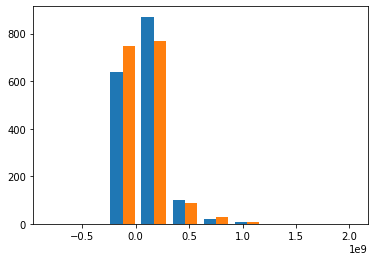

In [33]:
plt.hist((predicted, y_test))#Comparando resultados

Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función estimator.score ya viene con una de las métricas de sklearn.metrics, que es la métrica sklearn.metric.r2_score
El score R2 de una regresión es una de las formas más comunes de entender su poder predictivo. Este mientras más cerca de 1 este, mejor es
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media.

In [34]:
model.score(X_test, y_test)

0.7948902261938726

Siempre visualiza tus resultados. Aunque tengas un buen score

In [35]:
residuals = y_test - predicted

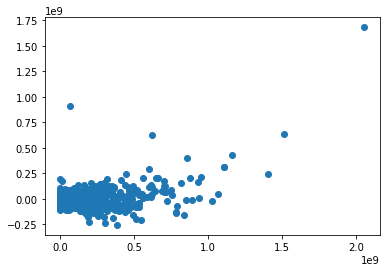

In [36]:
plt.scatter(y_test, residuals)

En los datos residuales buscamos que no exista más de un patron formado, en este caso vemos que es solo un grupo con uno que otros puntos dispersos

In [37]:
ap_residuals = np.abs(residuals) / y_test

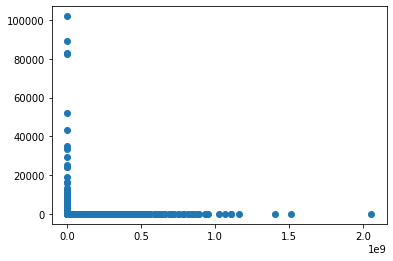

In [38]:
plt.scatter(y_test, ap_residuals)

In [39]:
lap_residuals = np.log(ap_residuals)

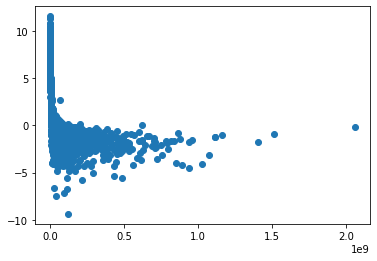

In [40]:
plt.scatter(y_test, lap_residuals)

C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


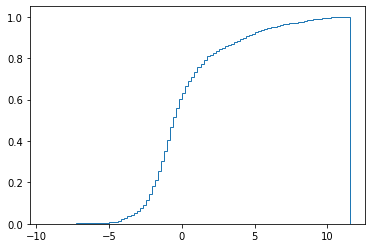

In [43]:
plt.hist(lap_residuals, bins=100,normed=1,histtype='step',cumulative=True);#; para que no muestre el output

C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

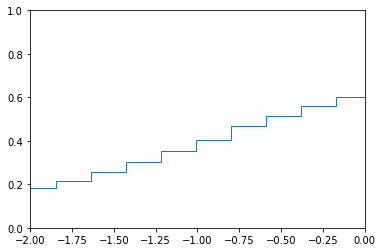

In [44]:
plt.hist(lap_residuals, bins=100,normed=1,histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))